In [194]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import time 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In this dataset there is: 8835 record 2763 different input keyword 657 different output classes

In [2]:
data = pd.read_csv('Complete_Dataset_2_FL-csv.csv', sep=",")
data.head()

,Keywords,Classification
0,"Classification systems,Health law,Health care,...",Life and medical sciences
1,"Information retrieval systems,Web software,Alg...",World Wide Web
2,"American culture,Social information processing...",Information systems applications;Information r...
3,"Data management,Software,Types of databases,Da...",Data management systems;Theory and algorithms ...
4,"Business terms,Temporal rates,Scientific metho...",Information systems applications


In [3]:
len(data)

7655

In [4]:
# null values?
data.isnull().any()

Keywords           True
Classification    False
dtype: bool

In [5]:
data.Keywords.isnull().sum()

35

In [6]:
# a null example:
for i in range(100):
    if type(data.Keywords[i]) == float:
        print i

40
82


In [7]:
data[39:42]

,Keywords,Classification
39,"Information retrieval systems,Web software,Alg...",Information retrieval
40,NaN,Information retrieval
41,"Data management,Software,Databases,Measurement...",Data management systems;Theory and algorithms ...


In [8]:
# drop null rows
data = data.dropna()
len(data)

7620

In [82]:
# how many distinct combinations of labels?
len(data.Classification.value_counts())

3411

In [85]:
# how many of those combinations appear only once?
sum(data.Classification.value_counts() == 1)

2912

In [10]:
# split keywords and labels
X = data.Keywords
X = X.apply(lambda x: x.split(','))
y = data.Classification
y = y.apply(lambda x: x.split(';'))

In [11]:
X.head()

0    [Classification systems, Health law, Health ca...
1    [Information retrieval systems, Web software, ...
2    [American culture, Social information processi...
3    [Data management, Software, Types of databases...
4    [Business terms, Temporal rates, Scientific me...
Name: Keywords, dtype: object

In [12]:
# convert keywords and labels into matrices of binary values
X_binarize = MultiLabelBinarizer().fit_transform(X)
y_binarize = MultiLabelBinarizer().fit_transform(y)

In [87]:
X_binarize

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [13]:
print X_binarize.shape
print y_binarize.shape

(7620, 2641)
(7620, 541)


In [230]:
dt = DecisionTreeClassifier()
gnb = OneVsRestClassifier(GaussianNB())
rf = RandomForestClassifier()
svm = OneVsRestClassifier(LinearSVC())
knn = KNeighborsClassifier()
nn = MLPClassifier(activation='relu', solver ='adam', random_state=42, 
                  hidden_layer_sizes=(175,), max_iter=200,)

In [208]:
dt_scores = cross_val_score(dt, X_binarize, y_binarize, scoring='accuracy', cv=7)

In [209]:
rf_scores = cross_val_score(rf, X_binarize, y_binarize, scoring='accuracy', cv=7)

In [231]:
gnb_scores = cross_val_score(gnb, X_binarize, y_binarize, scoring='accuracy', cv=7)

In [214]:
svm_scores = cross_val_score(svm, X_binarize, y_binarize, scoring='accuracy', cv=7)

/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 40 is present in all training examples.
  str(classes[c]))
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 90 is present in all training examples.
  str(classes[c]))
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 140 is present in all training examples.
  str(classes[c]))
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 167 is present in all training examples.
  str(classes[c]))
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 168 is present in all training examples.
  str(classes[c]))
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 189 is present in all training examples.
  str(classes[c]))
/Users/nickryan/anaconda/lib/p

In [211]:
knn_scores = cross_val_score(knn, X_binarize, y_binarize, scoring='accuracy', cv=7)

In [212]:
nn_scores = cross_val_score(nn, X_binarize, y_binarize, scoring='accuracy', cv=7)

In [232]:
scores = {'tree': dt_scores, 'forest': rf_scores, 'naive bayes' : gnb_scores, 'svm': svm_scores, 'knn': knn_scores, 'nn': nn_scores}
scores = pd.DataFrame(scores)

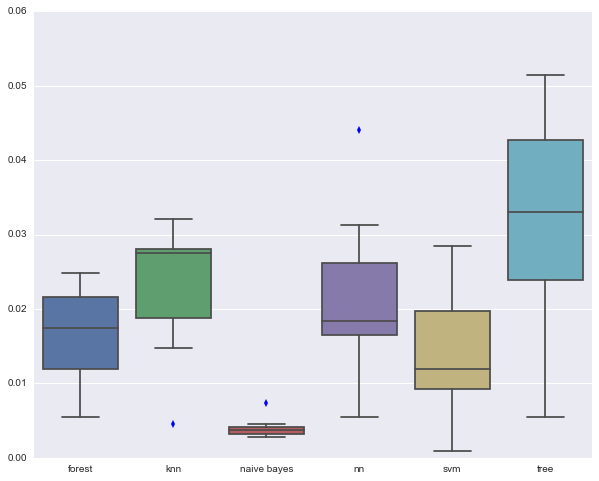

In [233]:
plt.figure(figsize=(10,8))
sns.boxplot(data=scores)

In [217]:
scores

{'forest': array([ 0.01928375,  0.01285583,  0.01101928,  0.02479339,  0.02389706,
         0.01746324,  0.00551471]),
 'knn': array([ 0.02754821,  0.02846648,  0.01469238,  0.03213958,  0.02757353,
         0.02297794,  0.00459559]),
 'nn': array([ 0.01836547,  0.02112029,  0.01652893,  0.04407713,  0.03125   ,
         0.01654412,  0.00551471]),
 'svm': array([ 0.01193756,  0.00826446,  0.01010101,  0.02571166,  0.02849265,
         0.01378676,  0.00091912]),
 'tree': array([ 0.03856749,  0.03305785,  0.01928375,  0.05142332,  0.046875  ,
         0.02849265,  0.00551471])}